# Предсказание эмоции

В данном ноутбуке показано как использовать модель для предсказания эмоции на изображении. Модель может предсказывать эмоцию принимая на вход метода predict как путь до файла, так и numpy-представление RGB изображения.


In [6]:
# Устанавливаем модуль import_ipynb и импортируем его.
# Он необходим для импорта файлов .ipynb.
try:
    import import_ipynb
except ModuleNotFoundError:
    ! pip install import-ipynb
    import import_ipynb

# Клонируем проект. Далее из проекта нам понадобиться файл 
# импорта модели - import_model.ipynb, расположенный в корне проекта.
try:
    from skillbox_thesis_project.import_model import Model
except ModuleNotFoundError:
    ! git clone https://github.com/GrinkoL/skillbox_thesis_project.git
    from skillbox_thesis_project.import_model import Model

# Имплементируем модель
model = Model()

In [7]:
import gdown
import os

# Загружаем и распаковываем тестовый датасет, а также удаляем загруженный архив.
if not os.path.exists('test'):
    if not os.path.exists('test.zip'):
        gdown.download('https://drive.google.com/uc?id=1bGHeWeWYXj5biL9s-qTc9gyv91WNAbWE', 'test.zip', False)
    ! unzip -j test.zip -d test > /dev/null
    ! rm test.zip

In [11]:
# Выполним предсказание эмоции на одном из тестовых изображений
# и попутно замерим скорость инференса.
# ВНИМАНИЕ! Первый запуск c GPU будет происходит долго,
# порядка нескольких секунд, поэтому замерять нужно со второго запуска.
%%time
img_path = 'test/70.jpg'
emotion = model.predict(img_path)

CPU times: user 15.9 ms, sys: 5.62 ms, total: 21.5 ms
Wall time: 24.7 ms


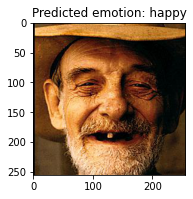

In [9]:
# Посмотрим на выбранное изображение и результат инференса.
import matplotlib.pyplot as plt
from PIL import Image

def visualize(img_path):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title(f'Predicted emotion: {emotion}')
  plt.imshow(Image.open(img_path))

visualize(img_path)

In [10]:
#  Запуск предсказания по numpy-представлению изображения
from tensorflow.keras.preprocessing import image
im = image.load_img('test/70.jpg', target_size=(224,224))
im = image.img_to_array(im)
model.predict(im)

'happy'